In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect 


In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn=engine.connect()


In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
measurement = pd.read_sql('select * from measurement',conn)
measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [9]:
measurement['date'].max()

'2017-08-23'

In [10]:
measurement.dtypes

id           int64
station     object
date        object
prcp       float64
tobs       float64
dtype: object

In [11]:
station = pd.read_sql('select * from station',conn)
station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [12]:
station.dtypes

id             int64
station       object
name          object
latitude     float64
longitude    float64
elevation    float64
dtype: object

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [15]:
from sqlalchemy.sql import column

In [16]:
import datetime as dt
from datetime import datetime 

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
twelve_mos = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date >= '2016-08-24',Measurement.date <= '2017-08-23',Measurement.prcp != None).order_by(Measurement.date.desc()).all()
twelve_mos

x = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date_minus_yr = datetime.strptime(x[0],'%Y-%m-%d') - dt.timedelta(days=365)
prcp = engine.execute(f"Select date,station,prcp from Measurement where date >= :x and prcp is not null ", {'x': last_date_minus_yr}).fetchall()


prcp



[('2016-08-24', 'USC00519397', 0.08),
 ('2016-08-25', 'USC00519397', 0.08),
 ('2016-08-26', 'USC00519397', 0.0),
 ('2016-08-27', 'USC00519397', 0.0),
 ('2016-08-28', 'USC00519397', 0.01),
 ('2016-08-29', 'USC00519397', 0.0),
 ('2016-08-30', 'USC00519397', 0.0),
 ('2016-08-31', 'USC00519397', 0.13),
 ('2016-09-01', 'USC00519397', 0.0),
 ('2016-09-02', 'USC00519397', 0.0),
 ('2016-09-03', 'USC00519397', 0.0),
 ('2016-09-04', 'USC00519397', 0.03),
 ('2016-09-07', 'USC00519397', 0.05),
 ('2016-09-08', 'USC00519397', 0.0),
 ('2016-09-09', 'USC00519397', 0.03),
 ('2016-09-10', 'USC00519397', 0.0),
 ('2016-09-11', 'USC00519397', 0.05),
 ('2016-09-12', 'USC00519397', 0.0),
 ('2016-09-13', 'USC00519397', 0.02),
 ('2016-09-14', 'USC00519397', 1.32),
 ('2016-09-15', 'USC00519397', 0.42),
 ('2016-09-16', 'USC00519397', 0.06),
 ('2016-09-17', 'USC00519397', 0.05),
 ('2016-09-18', 'USC00519397', 0.0),
 ('2016-09-19', 'USC00519397', 0.0),
 ('2016-09-20', 'USC00519397', 0.0),
 ('2016-09-21', 'USC00519

In [18]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [19]:
# Perform a query to retrieve the data and precipitation scores
prcp_yrago = session.query(Measurement.date,Measurement.prcp).\
filter(Measurement.date >= year_ago,Measurement.prcp != None).order_by(Measurement.date).all()
prcp_yrago

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
pcrp_pd = pd.DataFrame(prcp_yrago).set_index('date')
pcrp_pd.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


In [21]:
# Sort the dataframe by date
pcrp_pd = pcrp_pd.sort_values('date',ascending=True)
pcrp_pd.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


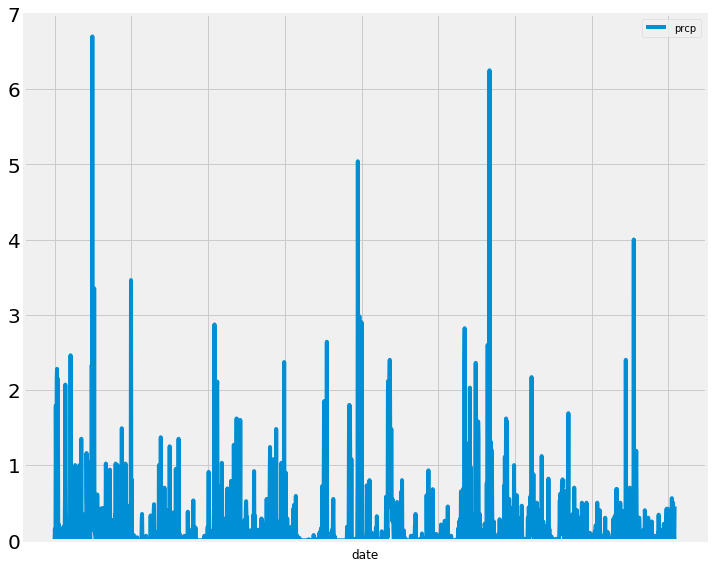

In [22]:
pcrp_pd.plot(figsize=(10,8),fontsize=20,ylim=(0,7),legend='precipitation')
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [24]:
pcrp_pd.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
engine.execute('select * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [26]:
station

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [27]:
# Design a query to show how many stations are available in this dataset?
total_stations = engine.execute('select count(*) from station').fetchall()
total_stations

[(9,)]

In [28]:
measurement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [29]:
engine.execute('select * from station group by name').fetchall()

[(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)]

In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_stations = engine.execute('Select id, station, count(station) from measurement group by station order by count(station) desc;').fetchall()
active_stations

[(12188, 'USC00519281', 2772),
 (1, 'USC00519397', 2724),
 (2725, 'USC00513117', 2709),
 (9519, 'USC00519523', 2669),
 (16939, 'USC00516128', 2612),
 (5434, 'USC00514830', 2202),
 (14960, 'USC00511918', 1979),
 (7636, 'USC00517948', 1372),
 (9008, 'USC00518838', 511)]

In [31]:
high_num_observations = engine.execute('Select id, station, count(tobs) from measurement group by station order by count(station) desc;').first()
high_num_observations

(12188, 'USC00519281', 2772)

In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
#temp = session.query(Measurement.id, func.min(Measurement.tobs), Measurement.id, func.max(Measurement.tobs)).all()

In [33]:
lowest_highest_temp = engine.execute("select min(tobs), max(tobs) from measurement where station ='USC00519281'").fetchall()
lowest_highest_temp

[(54.0, 85.0)]

In [34]:
avg_temp_most_active = engine.execute("select avg(tobs) from measurement where station = 'USC00519281' ").fetchall()
avg_temp_most_active

[(71.66378066378067,)]

In [35]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

y = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date_minus_yr = datetime.strptime(y[0],'%Y-%m-%d') - dt.timedelta(days=365)
tobs_highest_obs = engine.execute(f"Select date,station,tobs from Measurement where station='USC00519281' and date >= :y and tobs is not null ", {'y': last_date_minus_yr}).fetchall()
tobs_highest_obs

[('2016-08-24', 'USC00519281', 77.0),
 ('2016-08-25', 'USC00519281', 80.0),
 ('2016-08-26', 'USC00519281', 80.0),
 ('2016-08-27', 'USC00519281', 75.0),
 ('2016-08-28', 'USC00519281', 73.0),
 ('2016-08-29', 'USC00519281', 78.0),
 ('2016-08-30', 'USC00519281', 77.0),
 ('2016-08-31', 'USC00519281', 78.0),
 ('2016-09-01', 'USC00519281', 80.0),
 ('2016-09-02', 'USC00519281', 80.0),
 ('2016-09-03', 'USC00519281', 78.0),
 ('2016-09-04', 'USC00519281', 78.0),
 ('2016-09-05', 'USC00519281', 78.0),
 ('2016-09-06', 'USC00519281', 73.0),
 ('2016-09-07', 'USC00519281', 74.0),
 ('2016-09-08', 'USC00519281', 80.0),
 ('2016-09-09', 'USC00519281', 79.0),
 ('2016-09-10', 'USC00519281', 77.0),
 ('2016-09-11', 'USC00519281', 80.0),
 ('2016-09-12', 'USC00519281', 76.0),
 ('2016-09-13', 'USC00519281', 79.0),
 ('2016-09-14', 'USC00519281', 75.0),
 ('2016-09-15', 'USC00519281', 79.0),
 ('2016-09-16', 'USC00519281', 78.0),
 ('2016-09-17', 'USC00519281', 79.0),
 ('2016-09-18', 'USC00519281', 78.0),
 ('2016-09-1

In [36]:
tobs_highest_obs_pd = pd.DataFrame(tobs_highest_obs,columns=['date','station','tobs'])
tobs_highest_obs_pd.head()

,date,station,tobs
0,2016-08-24,USC00519281,77.0
1,2016-08-25,USC00519281,80.0
2,2016-08-26,USC00519281,80.0
3,2016-08-27,USC00519281,75.0
4,2016-08-28,USC00519281,73.0


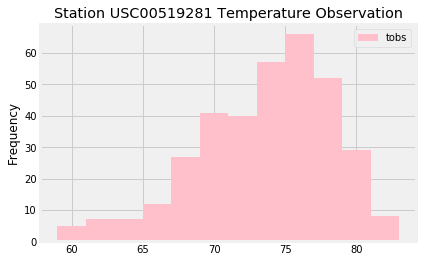

In [37]:
plt.hist(tobs_highest_obs_pd['tobs'], bins=12,color='pink',label='tobs')
plt.legend(loc='best')
plt.title('Station USC00519281 Temperature Observation')
plt.ylabel('Frequency')
plt.show()



In [38]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [39]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [40]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [41]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [42]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [43]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [44]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [45]:
# Plot the daily normals as an area plot with `stacked=False`
